# Unsupervised machine learning Algorithm 

# 1. KMmeans Clustering 

#### This machine learning algorithm creates the cluster from the data with the calculation of mean and changing of mean let to best selection of cluster 

In [1]:
### Initilization Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set_theme('notebook')

In [2]:
### Creating Random data inputs
X = np.random.random(size=1000)
y= np.random.random(size=1000)

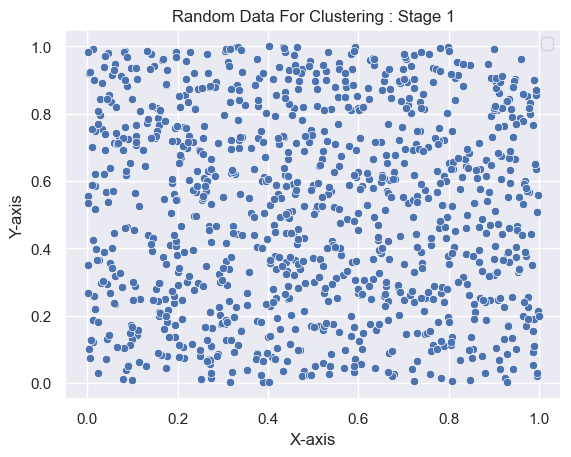

In [3]:
sns.scatterplot(x=X,y=y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Random Data For Clustering : Stage 1')
plt.legend()

In [4]:
### Initilization KMMmeans cluster algorithm
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,init='k-means++')
model.fit(X.reshape(-1,1),y.reshape(-1,1))
x_pred=model.predict(X.reshape(-1,1))
y_pred=model.predict(y.reshape(-1,1))

In [5]:
x_pred,y_pred

(array([1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0,
        0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 0,
        2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1,
        1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1,
        2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2,
        2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2,
        0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 2,
        0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1,
        0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1,
        1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0,
        1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1,
        0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 

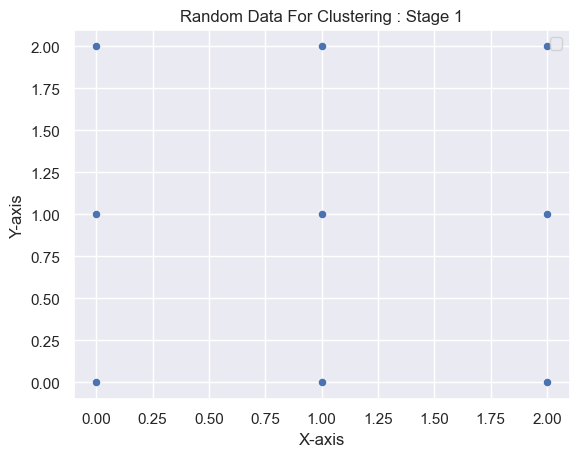

In [6]:
### ploting predicated clusters
sns.scatterplot(x=x_pred,y=y_pred)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Random Data For Clustering : Stage 1')
plt.legend()

#### -> This is more randomized and the cluster are created are quite more unrelatable so lets check with best created sklearn dataset 

In [7]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=1000,noise=0.4,random_state=42)
df=pd.DataFrame(x,columns=['feature1','feature2'])
df['labels']=y
df

,feature1,feature2,labels
0,-0.232060,0.672274,1
1,1.363916,-0.188250,1
2,0.650890,0.475327,1
3,-0.242222,-0.758457,1
4,-0.782520,0.561875,0
...,...,...,...
995,0.886198,0.252155,0
996,-0.262998,0.675905,0
997,1.814306,-0.590043,1
998,-1.109057,-0.121657,0


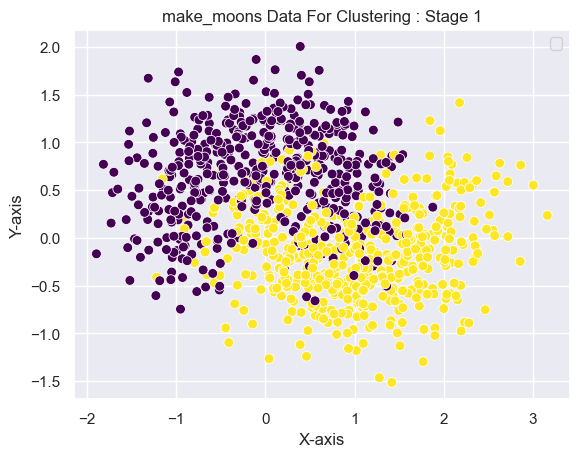

In [8]:
sns.scatterplot(x=df['feature1'],y=df['feature2'],c=df['labels'],cmap='viridis',s=50)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('make_moons Data For Clustering : Stage 1')
plt.legend()

In [9]:
## initial model just for test 
model=KMeans(n_clusters=3) 
model.fit(df[['feature1','feature2']])
df['kmeans_clusters']=model.labels_

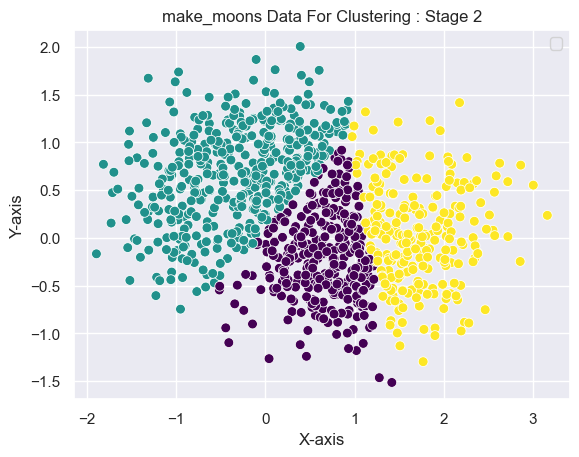

In [10]:
sns.scatterplot(x=df['feature1'],y=df['feature2'],c=df['kmeans_clusters'],cmap='viridis',s=50)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('make_moons Data For Clustering : Stage 2')
plt.legend()

Text(0.5, 1.0, 'Elbow Plot')

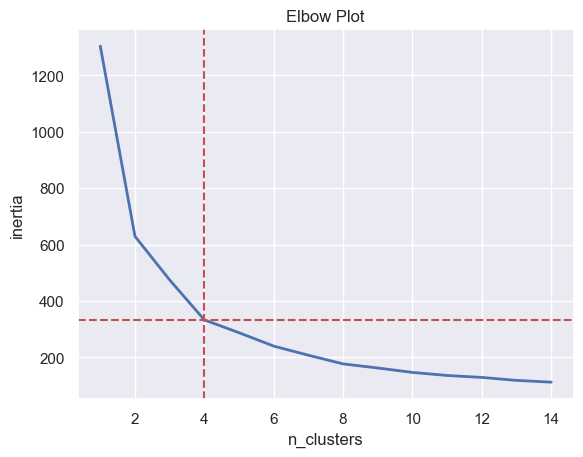

In [11]:
### Lets know how to select the best value of
inertia=[]
kmeans=range(1,15)
for n in kmeans:
    model=KMeans(n_clusters=n,random_state=42)
    model.fit(df[['feature1','feature2']])
    df[f'kmeans_cluster{n}']=model.labels_
    inertia.append(model.inertia_)

sns.lineplot(x=kmeans,y=inertia,linewidth=2,legend='auto')
plt.axvline(x=4,ymin=0,ymax=inertia[3],color='r',linestyle='--')
plt.axhline(y=inertia[3],xmax=4,color='r',linestyle='--')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.title('Elbow Plot')

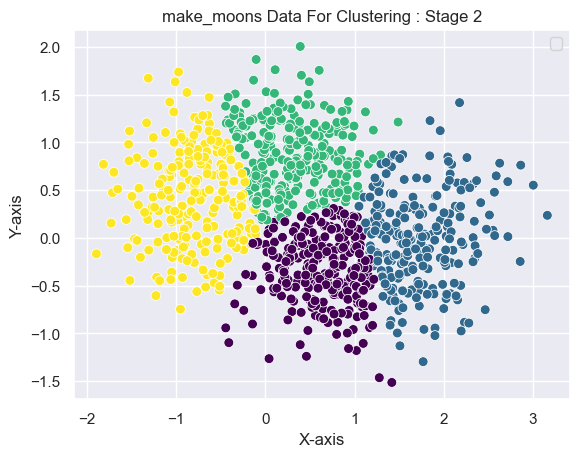

In [12]:
## cluster for value = 4
model=KMeans(n_clusters=4) 
model.fit(df[['feature1','feature2']])
df['kmeans_clusters_last']=model.labels_
sns.scatterplot(x=df['feature1'],y=df['feature2'],c=df['kmeans_clusters_last'],cmap='viridis',s=50)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('make_moons Data For Clustering : Stage 2')
plt.legend()

# 2. Hierarchical Clustering

#### So in this algorithm we are basically working with the distance between each point to calculate the cluater space . So main drawback of it is that it can't work with large data set due to huge cluaters calculation and most easy way to calculate the cluster is the dendogram plot . Distance matrix is used is either manhaten distance or euclidean distance 

#### There are two types of hierarchical clustering 
##### 1. Agglomertive cluatering - combining nearest cluater as the cluster and then move outside
##### 2. Divisive cluatering - first consider whole as cluater then go back by deleting points (reverse of agglomertive cluatering)

In [13]:
## Same data is using not changing
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
model_euclidean=AgglomerativeClustering(n_clusters=4,metric='euclidean')
model_Manhattan=AgglomerativeClustering(n_clusters=4,metric='manhattan',linkage='average')

In [15]:
labels_euclidean=model_euclidean.fit_predict(df[['feature1','feature2']])
labels_manhattan=model_Manhattan.fit_predict(df[['feature1','feature2']])

Text(0.5, 1.0, 'Hirerachical clustering with manhattan cluatering')

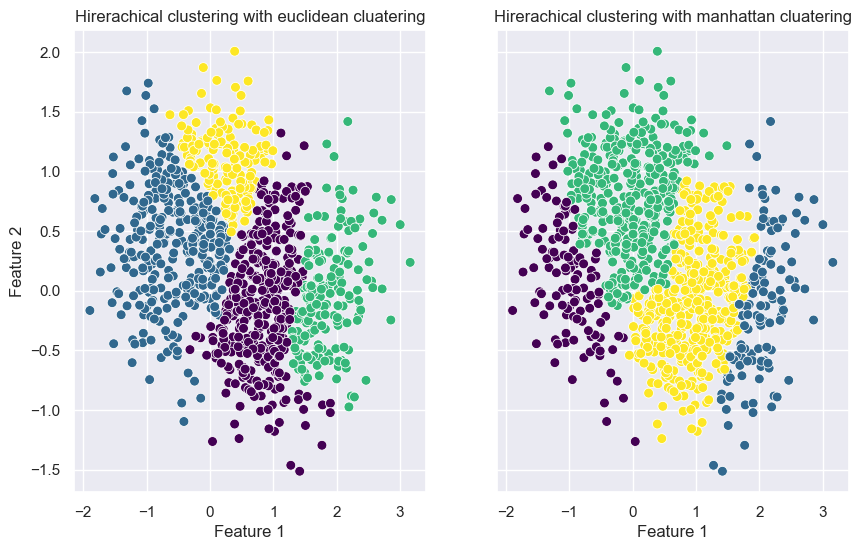

In [16]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,6),sharey=True)
sns.scatterplot(x=df['feature1'],y=df['feature2'],c=labels_euclidean,s=50,cmap='viridis',ax=ax[0])
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].set_title('Hirerachical clustering with euclidean cluatering')
sns.scatterplot(x=df['feature1'],y=df['feature2'],c=labels_manhattan,s=50,cmap='viridis',ax=ax[1])
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].set_title('Hirerachical clustering with manhattan cluatering')

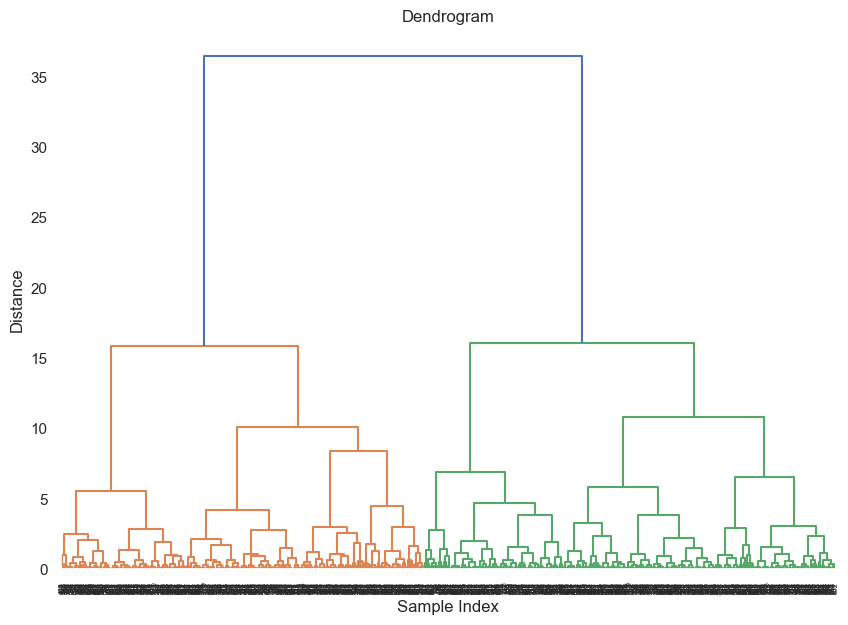

In [17]:
### ploting Dendogram 
Z = linkage(df[['feature1','feature2']], method='ward',metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

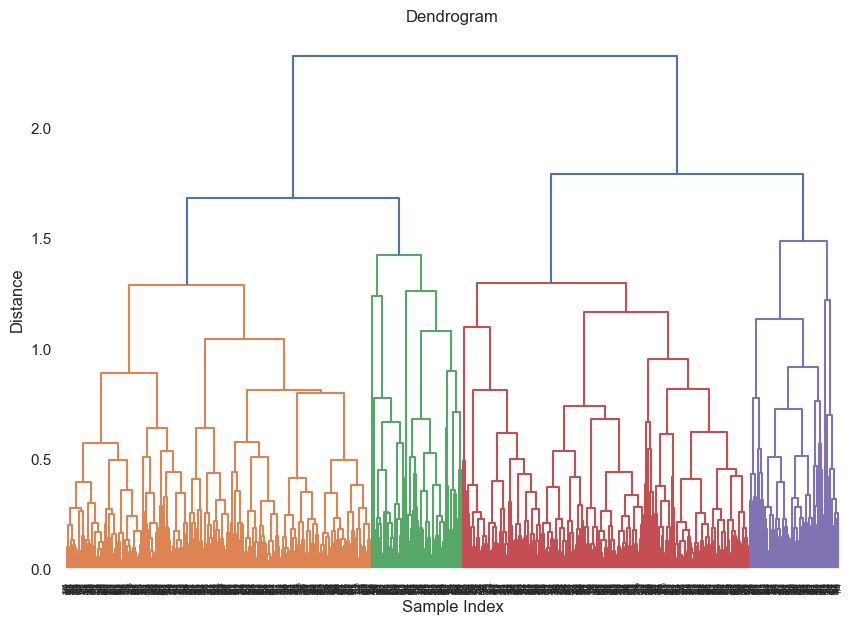

In [18]:
### ploting Dendogram 
Z = linkage(df[['feature1','feature2']], method='average',metric='cityblock') ## cityblock=manhattan

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

##### Note: The above cluaters dendogram are not for the n_clustares that we had specified int the above plot it is just use to get how much cluster are required ( like elboew plot of hierarchical clustering )

# 3. DBSCAN 

#### So this is best unsupervised algo because of this noise.outlier predicating property . It basically works on three term to predict the cluater and there is not cluater selection and no centriod option . The terms are (1) Core point (2) Border point (3) outlier

#### (1) Core Point - The point which satisfy the hyperparameter 
#### (2) Border Point - The point which are in the case but unable to satisfy the the hyperparameter condition
#### (3) Outlier - The point which are not able to satisfy the condition 
#### Hyperparametr 
#### (1) min_samples - the minimum number of samples in the circle 
#### (2) eps - the threshold/radius of the circle 

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
df_dbscan = pd.DataFrame(X, columns=["feature1", "feature2"])
df['labels']=y

<Axes: xlabel='feature1', ylabel='feature2'>

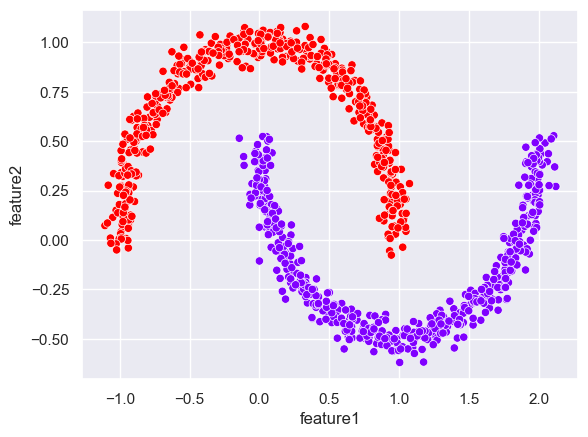

In [21]:
model=DBSCAN(min_samples=5,eps=0.3,metric='euclidean').fit(df_dbscan[['feature1','feature2']])
model.labels_
sns.scatterplot(x=df_dbscan['feature1'],y=df_dbscan.feature2,c=model.labels_,cmap='rainbow')

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score   
param_grid={
    'eps':[0.01,0.1,0.2,0.3,0.4,0.5,0.6],
    'min_samples':[1,2,3,4,5,6,7,8],
    'metric':['euclidean','manhattan']
}
model=DBSCAN()
grid_cv=GridSearchCV(model,param_grid,cv=3,verbose=2,n_jobs=-1,scoring=silhouette_score)
grid_cv.fit(df[['feature1','feature2']])
print(f"Best Parameter : {grid_cv.best_params_}")

Fitting 3 folds for each of 112 candidates, totalling 336 fits
Best Parameter : {'eps': 0.01, 'metric': 'euclidean', 'min_samples': 1}


#### So at end there is an metrics for checking how good are ckuster is 
# Shilhouette Score
#### It is basically calculates to check that how best the cluster are 
#### The silhouette value ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
#### So How does it work so it work by finding two parameter a and b 
#### Internal Distance Calculation : IN this part the internal distance is claculated between all point and then the mean of it by neglecting it so this is calculated for all point and that value is stored in a
#### External Distance Calculation : IN this part the extarnal distance is clalculated i.e the most far point from the Internal cluster which is used to calculatr the distance with respect to it the distance is calculated of thr all point of nearest cluster and it is stored in b 

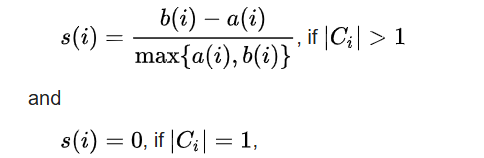

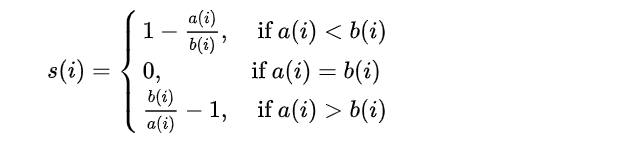

+1: Indicates well-separated clusters, with data points strongly belonging to their assigned cluster. 
0: Indicates overlapping clusters, where data points might be equally distant from their own and neighboring clusters. 
-1: Indicates that data points are likely assigned to the wrong cluster. 


In [23]:
## Lets calculate the score for dbscan
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(df_dbscan[['feature1','feature2']],model_euclidean.fit_predict(df[['feature1','feature2']]))

0.2144612717268671

##### It is in the middle not good not bad

In [25]:
silhouette_score(df_dbscan[['feature1','feature2']],model_Manhattan.fit_predict(df[['feature1','feature2']]),metric='manhattan')

0.18373128198515473

##### Worst than metric = euclidean 

# So Done for Today . 👍